# Project Three Notebook Example

For your final notebook, feel free to duplicate this notebook and edit as needed. 


## Load Some Stuff

This is where we load libraires and the like so we can do what we need. If you get an error saying a module is not loaded, open a new terminal/cmd line and try running: `pip install [module name]`. 

In [220]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning

Here we load the data we collected and get it all ready to feed to our statistical model(s). That is, we are trying to make a table with one **target** column and one or more **features**. Here I'm loading happiness.csv from: https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-responses-2011-2013-20/w898-3dfm Note: you can find information on the data elements at this link. 


In [221]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv('unmarried_woman.csv', parse_dates=[0]) 
raw_data_df.head()

,Year,Age,Race,Birth Rate
0,2015-01-01,15-19 years,All Races,20.2
1,2015-01-01,15-19 years,Asian or Pacific Islander total,5.5
2,2015-01-01,15-19 years,Black total,31.5
3,2015-01-01,15-19 years,Hispanic,31.6
4,2015-01-01,15-19 years,Non-Hispanic white,13.9


In [222]:
# You can explore unique entires by stating the column and using .unique() like this:
print(raw_data_df["Age"].unique())
print(raw_data_df["Race"].unique())
print(raw_data_df["Birth Rate"].unique())

['15-19 years' '20-24 years' '25-29 years' '30-34 years' '35-39 years'
 '40-44 years']
['All Races' 'Asian or Pacific Islander total' 'Black total' 'Hispanic'
 'Non-Hispanic white' 'White total']
[  20.2    5.5   31.5   31.6   13.9   18.8   22.     6.2   34.4   15.
   20.3   24.     7.2   38.5   37.6   16.2   21.9   26.7    8.1   43.4
   41.8   17.8   24.1   28.4    8.6   46.7   44.7   25.5   31.1    9.2
   50.8   50.    27.9   34.    10.6   55.9   56.7   21.8   30.4   35.9
   11.4   59.7   62.4   22.5   31.9   36.5   11.9   61.3   65.4   22.6
   32.3   35.5   12.    61.1   65.9   21.6   17.9   94.2   87.9   43.3
   54.6   61.6   19.4   97.4   92.3   44.4   63.1   20.7  100.7   93.1
   45.6   56.9   64.7  103.5   96.5   46.6   58.3   66.7   22.3  106.9
  100.6   47.8   60.1   70.    23.2  112.6  110.5   49.5   63.4   74.4
   25.3  119.5  125.4   51.4   67.3   78.1   26.4  124.   141.    52.9
   70.9   79.8   27.1  125.3  153.8   53.4   72.6   79.1   26.8  125.5
  155.1   52.6   71.7   

In [223]:
# You can explore rows with a specific value like so
raw_data_df[raw_data_df["Age"]=='20-24 years'].head() # remove .head() to see all entires

,Year,Age,Race,Birth Rate
60,2015-01-01,20-24 years,All Races,59.7
61,2015-01-01,20-24 years,Asian or Pacific Islander total,17.9
62,2015-01-01,20-24 years,Black total,94.2
63,2015-01-01,20-24 years,Hispanic,87.9
64,2015-01-01,20-24 years,Non-Hispanic white,43.3


In [224]:
# You can count the number of rows like so
print("Size of entire table: %s "%len(raw_data_df))
print("Size of entires matching filter: %s "%len(raw_data_df[raw_data_df["Age"]=="20-24 years"]))

Size of entire table: 360 
Size of entires matching filter: 60 


In [225]:
raw_data_df.loc[raw_data_df['Age'] == '15-19 years', 'Age'] = 18
raw_data_df.loc[raw_data_df['Age'] == '20-24 years', 'Age'] = 21
raw_data_df.loc[raw_data_df['Age'] == '25-29 years', 'Age'] = 26
raw_data_df.loc[raw_data_df['Age'] == '30-34 years', 'Age'] = 30
raw_data_df.loc[raw_data_df['Age'] == '35-39 years', 'Age'] = 35
raw_data_df.loc[raw_data_df['Age'] == '40-44 years', 'Age'] = 42
raw_data_df.loc[raw_data_df['Race'] == 'All Races', 'Race'] = 1
raw_data_df.loc[raw_data_df['Race'] == 'Asian or Pacific Islander total', 'Race'] = 2
raw_data_df.loc[raw_data_df['Race'] == 'Black total', 'Race'] = 3
raw_data_df.loc[raw_data_df['Race'] == 'Hispanic', 'Race'] = 4
raw_data_df.loc[raw_data_df['Race'] == 'Non-Hispanic white', 'Race'] = 5
raw_data_df.loc[raw_data_df['Race'] == 'White total', 'Race'] = 6
raw_data_df.head()


,Year,Age,Race,Birth Rate
0,2015-01-01,18,1,20.2
1,2015-01-01,18,2,5.5
2,2015-01-01,18,3,31.5
3,2015-01-01,18,4,31.6
4,2015-01-01,18,5,13.9


In [226]:
# You can add a columns like so.
raw_data_df["Pregnant"] = "N"
raw_data_df.head()

,Year,Age,Race,Birth Rate,Pregnant
0,2015-01-01,18,1,20.2,N
1,2015-01-01,18,2,5.5,N
2,2015-01-01,18,3,31.5,N
3,2015-01-01,18,4,31.6,N
4,2015-01-01,18,5,13.9,N


In [227]:
# And then you can customize these new coulmns using the same method as above. 
raw_data_df.loc[raw_data_df['Birth Rate'] >= 55, 'Pregnant'] = "Y"
raw_data_df.head()

,Year,Age,Race,Birth Rate,Pregnant
0,2015-01-01,18,1,20.2,N
1,2015-01-01,18,2,5.5,N
2,2015-01-01,18,3,31.5,N
3,2015-01-01,18,4,31.6,N
4,2015-01-01,18,5,13.9,N


In [228]:
# I'm now going to make a set of tables to be used in training some models
# The first set will be for linear regressions where the traget is numeric.
# Death
pregnant_lin_df = raw_data_df[[
                               'Birth Rate', 
                               'Age', 
                                'Race'
                               ]].copy()
pregnant_lin_df.head()

,Birth Rate,Age,Race
0,20.2,18,1
1,5.5,18,2
2,31.5,18,3
3,31.6,18,4
4,13.9,18,5


In [229]:
# The second set will be for classifiers where the target is a class.
# Death
pregnant_class_df = raw_data_df[[
                               'Pregnant', 
                               'Age',
                                'Race'
                               ]].copy()
pregnant_class_df.head()

,Pregnant,Age,Race
0,N,18,1
1,N,18,2
2,N,18,3
3,N,18,4
4,N,18,5


## Taining and Validation

Above I created four datasets worth exploring: 
- **`happy_lin_df`**. The data needed to access *happiness* along a continuous variable.
- **`sat_lin_df`**. The data needed to access *satisfaction* along a continuous variable.
- **`happy_class_df`**. The data needed to access *happiness* as a categorical variable.
- **`sat_class_df`**. The data needed to access *satisfaction* as a categorical variable.

Let's take them each in turn. 

## death_lin_df



In [230]:
data = pregnant_lin_df

data = data[data["Birth Rate"]<=200]

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

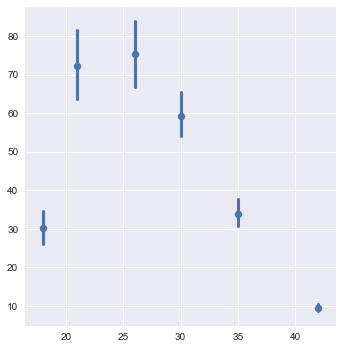

In [231]:
sns.lmplot(x="Age", y="Birth Rate", data=training, x_estimator=np.mean, order=1)

In [ ]:
sns.lmplot(x="Race", y="Birth Rate", data=training, x_estimator=np.mean, order=1)

In [ ]:
model = ols("Birth Rate ~ Age + Race", training).fit()
#model = ols("happy ~ age + income + np.power(age, 2) + np.power(income, 2)", training).fit()
model.summary()

In [232]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("Birth Rate", axis=1).as_matrix(columns=None)
labels_train = training["Birth Rate"].as_matrix(columns=None)

features_test = holdout.drop("Birth Rate", axis=1).as_matrix(columns=None)
labels_test = holdout["Birth Rate"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.159837787251
Accuracy: 0.151216463795


## death_class_df

Percentage of Ys: 0.38055555555555554



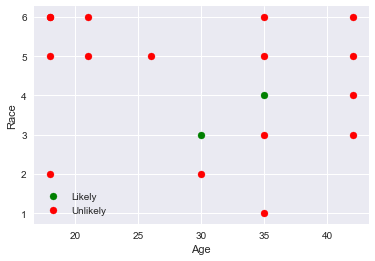

In [233]:
data = pregnant_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("Pregnant", axis=1).as_matrix(columns=None)
labels_train = training["Pregnant"].as_matrix(columns=None)

features_test = holdout.drop( "Pregnant", axis=1).as_matrix(columns=None)
labels_test = holdout["Pregnant"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["Pregnant"]=="Y"])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Likely")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Unlikely")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Race")
plt.show()


Logistic Regression
Accuracey: 0.666666666667

True Negatives: 12
False Positives: 4
False Negatives: 2
True Positives: 0
Recall: 0.0
Precision: 0.0
F1 Score: 0.0


C:\Users\Loren\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


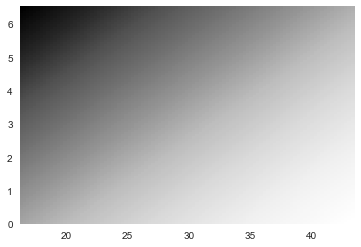


Y
1.0


Decision Tree
Accuracey: 0.888888888889

True Negatives: 15
False Positives: 1
False Negatives: 1
True Positives: 1
Recall: 0.5
Precision: 0.5
F1 Score: 0.5


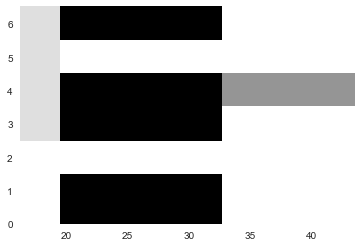

Random Forest
Accuracey: 0.944444444444

True Negatives: 15
False Positives: 1
False Negatives: 0
True Positives: 2
Recall: 0.666666666667
Precision: 1.0
F1 Score: 0.8


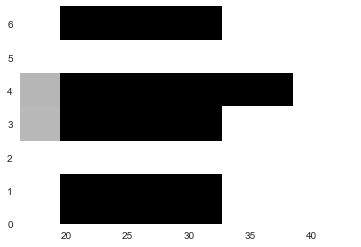

SVM
Accuracey: 0.944444444444

True Negatives: 15
False Positives: 1
False Negatives: 0
True Positives: 2
Recall: 0.666666666667
Precision: 1.0
F1 Score: 0.8


In [234]:
# Logistic Regression
model = LogisticRegression(fit_intercept = False, C = 1e9)
clf = model.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Logistic Regression")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


# Test some spot
x_test = 70
y_test = 160000
print("")
print(clf.predict([[x_test,y_test]])[0])
print(clf.predict_proba([[x_test,y_test]])[0][1])
print("")

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("\nDecision Tree")
evaluate(pred, labels_test)
plot_bound("Y",holdout,1,2,0)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Random Forest")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


from sklearn.svm import SVC
clf = SVC(kernel="rbf",probability=True)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("SVM")
evaluate(pred, labels_test)  
#plot_bound("Y",holdout,1,2,0) # plot doesn't work with SVM